<h1>Модель ценообразования капитальных активов <br> (Capital Asset Pricing Model, CAPM) и Альфа Дженсена (Jensen's alpha, ex-post alpha)</h1>

<p>Разработано Драчуком А. для The Foundation</p>
<a href="https://t.me/LYFTN">Следите за нами в Телеграм</a>

<p>Согласно Модели ценообразования капитальных активов (Capital Asset Pricing Model, далее — CAPM) в качестве требуемой доходности для акционерного капитала можно использовать ожидаемую доходность акции (доли) этой компании (проекта).</p>
<p>Ожидаемая доходность этой акции при этом оценивается по линейной однофакторной модели следующего вида:</p>
<p></p>
$$
  E(R_i) = R_f + \beta_i \cdot [E(R_{mkt}) - R_f] \quad,
$$
<p>где: </p>
<p>$E()$ — математическое ожидание</p>
<p>$E(R_i)$ — математическое ожидание доходности ценной бумаги $i$</p>
<p>$R_f$ — безрисковая ставка</p>
<p>$E(R_{mkt})$ — математическое ожидание среднерыночной доходности (например, S&P500 или любого другого индекса)</p>
<p>$[E(R_{mkt}) - R_f]$ — рыночная риск-премия (премия за рыночный риск) или, другими словами, дополнительная доходность, компенсирующая риски вложения в инструменты (активы), отличные от безрискового</p>
<p>$\beta_i$ - коэффициент бета, представляет собой коэффициент наклона доходности </p>

<p></p>
<p>Для удобства знаки математического ожидания обычно опускают, в результате чего получается запись следующего вида:</p>
<p></p>
$$
  R_i = R_f + \beta_i \cdot [R_{mkt} - R_f]
$$
<p><br></p>
<p>В основе модели CAPM лежит допущение, что доходность конкретного инструмента зависит от двух компонентов: рыночной доходности ($\alpha$, обычно приравнивается к нулю) и рыночной премии ($[E(R_{mkt}) - R_f]$). Это можно условно выразить следующим уравнением:</p>
<p></p>
$$
  R_i - R_f = \alpha + \beta_i \cdot [R_{mkt} - R_f]
$$
<p><br></p>
<p>Появившася в последнем уравнении $\alpha$ - представляет собой коффициент "Альфа Дженсена". Это коэффициент был представлен в 1968 г. управляющим инвестиционным фондом Майклом Дженсеномв в качестве оценки избыточной доходности инструмента или портфеля с поправкой на риск. В настоящий момент предполагается, что финансовые рынки слишком эффективны для того, чтобы регулярно получать положительную альфу (интерпретацию см. ниже). Вместе с тем, альфа вплоть до настоящего времени широко используется в сочетании с коэффициентом Шарпа и коэффициентом Трейнора для оценки эффективности работы управляющих взаимными фондами и портфелями. Альфа находится по следующей формуле:</p>
<p></p>
$$
   \alpha = R_i - (R_f +  \beta_i \cdot [R_{mkt} - R_f])
$$
<p><br></p>
<p>Коэффициент бета в модели CAPM представляет собой коэффициент наклона (чувствительности к изменению) к фактору доходности рынка. Это означает, пример, что, если доходность рынка вырастет на 1%, требуемая доходность конкретного инструмента (акции) вырастет на [$\beta \cdot 1\%$], и наоборот. Чтобы рассчитать коэффициент $\beta$ необходимо ковариацию доходности конкретного инструмента и рыночной доходности разделить на вариацию рыночной доходности:</p>
<p></p>
$$
   \beta_{i} = \frac{Cov(R_{i}, R_{mkt})}{Var(R_{mkt})}= \frac{\sigma_{i, mkt}}{\sigma_{mkt}^2} = \frac{\rho_{i, mkt} \cdot \sigma_{mkt} \cdot \sigma_{i}}{\sigma_{mkt} \cdot \sigma_{mkt}} = \frac{\rho_{i, mkt} \cdot \sigma_{i}}{\sigma_{mkt}}
$$

<h3>Импортируем необходимые библиотеки</h3>

In [145]:
import pandas as pd        #библитека для работы с данными
import numpy as np        #библиотека для работы с массивами и матрицами
import statsmodels.api as sm 
import yfinance as yf        #библиотека для работы с данными с Yahoo Finance
import matplotlib.pyplot as plt        #импорт модуля для формирования графиков из библиотеки для визуализации данных

<h3>Задаем глубину фактических данных для анализа</h3>

In [146]:
years = 15        #указываем кол-во лет для анализа

endDate = dt.datetime.now()        #задаем конечную дату -- текущий момент времени
startDate = endDate - dt.timedelta(days = 365 * years)        #начальная дата: текущий момент времени - кол-во лет

<h3>Выгружаем данные по тикерам</h3>

In [147]:
#AAPL -- Apple Inc.
#SPY -- SPDR S&P 500 ETF Trust

stock_ticker = 'AAPL'        #задаем тикер конкретного инструмента (акции), которую мы оцениваем 
benchmark_ticker = 'SPY'        #задаем тикер рыночной доходности, относительно которой мы измеряем доходность конкретного инструмента

stock_data = yf.download(stock_ticker, start = startDate, end = endDate)        #выгружаем фактические данные для конкретного инструмента (акции)
benchmark_data = yf.download(benchmark_ticker, start = startDate, end = endDate)        #выгружаем данные для тикера, который используем в качестве рыночной доходности

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [148]:
#для тикера конкретного инструмента
adj_close_stock_data = stock_data['Adj Close']       #из массива данных stock_data выбираем столбец 'Adj Close'

print(adj_close_stock_data)        #проверяем формирование данных по тикеру конкретного инструменту

Date
2009-06-12      4.135773
2009-06-15      4.109202
2009-06-16      4.117053
2009-06-17      4.093802
2009-06-18      4.102860
                 ...    
2024-06-03    194.029999
2024-06-04    194.350006
2024-06-05    195.869995
2024-06-06    194.479996
2024-06-07    196.889999
Name: Adj Close, Length: 3773, dtype: float64


In [149]:
#для тикера, который мы используем в качестве рыночной доходности
adj_close_benchmark_data = benchmark_data['Adj Close']      #из массива данных stock_data выбираем столбец 'Adj Close'

print(adj_close_benchmark_data)        #проверяем формирование данных по тикеру, который используем в качестве рыночной доходности

Date
2009-06-12     71.733589
2009-06-15     70.088867
2009-06-16     69.138260
2009-06-17     69.070358
2009-06-18     69.575844
                 ...    
2024-06-03    527.799988
2024-06-04    528.390015
2024-06-05    534.669983
2024-06-06    534.659973
2024-06-07    534.010010
Name: Adj Close, Length: 3773, dtype: float64


<h3>Преобразовываем массивы дневных цен в массивы дневных доходностей</h3>

In [150]:
#для тикера конкретного инструмента
stock_returns = adj_close_stock_data.pct_change().dropna()        #процентное изменение между значениями, и удаляем значения NaN

print(stock_returns)        #проверяем формирование данных по тикеру конкретного инструменту

Date
2009-06-15   -0.006425
2009-06-16    0.001911
2009-06-17   -0.005647
2009-06-18    0.002213
2009-06-19    0.026494
                ...   
2024-06-03    0.009259
2024-06-04    0.001649
2024-06-05    0.007821
2024-06-06   -0.007097
2024-06-07    0.012392
Name: Adj Close, Length: 3772, dtype: float64


In [151]:
#преобразование для тикера, который мы используем в качестве рыночной доходности
benchmark_returns = adj_close_benchmark_data.pct_change().dropna()        #из массива данных stock_data выбираем столбец 'Adj Close', после чего находим процентное изменение между значениями, и удаляем значения NaN
/
print(benchmark_returns)        #проверяем формирование данных по тикеру, который используем в качестве рыночной доходности

Date
2009-06-15   -0.022928
2009-06-16   -0.013563
2009-06-17   -0.000982
2009-06-18    0.007318
2009-06-19    0.003686
                ...   
2024-06-03    0.000815
2024-06-04    0.001118
2024-06-05    0.011885
2024-06-06   -0.000019
2024-06-07   -0.001216
Name: Adj Close, Length: 3772, dtype: float64


<h3>Объединяем массивы доходностей в одну таблицу</h3>

In [152]:
returns = pd.merge(stock_returns, benchmark_returns, on = 'Date', suffixes = (' stock return', ' benchmark return'))        #объединяем массивы по дате + указываем наименования столбцов

print(returns)        #проверяем результат

            Adj Close stock return  Adj Close benchmark return
Date                                                          
2009-06-15               -0.006425                   -0.022928
2009-06-16                0.001911                   -0.013563
2009-06-17               -0.005647                   -0.000982
2009-06-18                0.002213                    0.007318
2009-06-19                0.026494                    0.003686
...                            ...                         ...
2024-06-03                0.009259                    0.000815
2024-06-04                0.001649                    0.001118
2024-06-05                0.007821                    0.011885
2024-06-06               -0.007097                   -0.000019
2024-06-07                0.012392                   -0.001216

[3772 rows x 2 columns]


<h3>Рассчитываем коэффициенты Бета и Альфа</h3>

In [153]:
x = returns['Adj Close benchmark return']        #указываем аргумент однофакторной линейной модели как вектор доходностей рынка
y = returns['Adj Close stock return']        #указываем моделируемую переменную как вектор доходностей конкретного инструмента

#для поиска беты и альфы формируем массив данных из аргумента и единичной матрицы. 
#методом 'np.ones' формируем едичиный вектор длиной х
#методом 'np.vstack' формируем матрицу из пар доходностей и единиц. 
#методом '.T' транспорнируем матрицу, чтобы она имела вид [x + 1]
X = np.vstack([x, np.ones(len(x))]).T        

print(X)        #проверяем результат

[[-2.29281987e-02  1.00000000e+00]
 [-1.35628858e-02  1.00000000e+00]
 [-9.82113398e-04  1.00000000e+00]
 ...
 [ 1.18851002e-02  1.00000000e+00]
 [-1.87213907e-05  1.00000000e+00]
 [-1.21565745e-03  1.00000000e+00]]


In [154]:
#методом 'linalg.lstsq(a, b[, rcond])' находим решение методом наименьших квадратов для линейного уравнения из матриц 
beta, alpha = np.linalg.lstsq(X,y,rcond=None)[0]

#проверяем результат
print(f'Beta: {beta}')
print(f'Alpha: {alpha}')

Beta: 1.1149981994878007
Alpha: 0.0005204715781788308


<h3>Визуализируем результаты</h3>

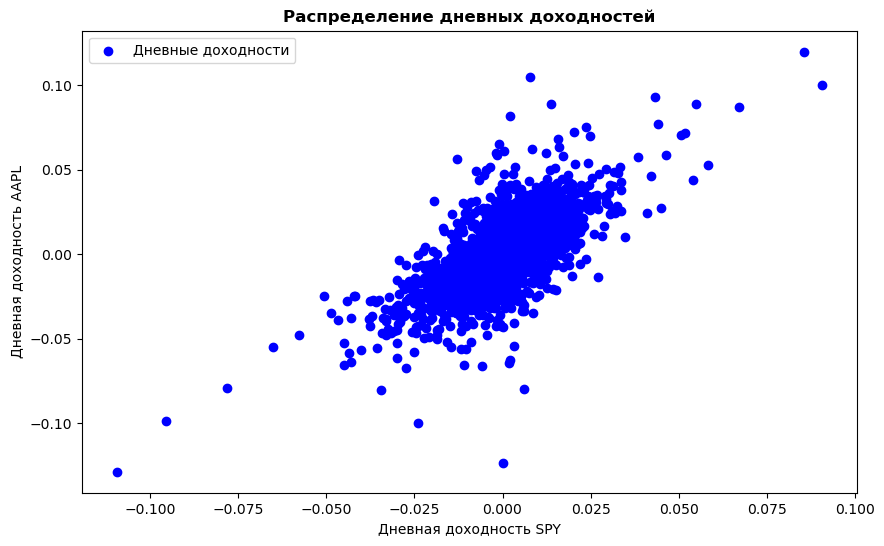

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = 'Дневные доходности', color = 'blue')

plt.xlabel(f'Дневная доходность {benchmark_ticker}')
plt.ylabel(f'Дневная доходность {stock_ticker}')
plt.title(label = f'Распределение дневных доходностей', fontweight='bold')
plt.legend(frameon=True, shadow=False)

plt.show()

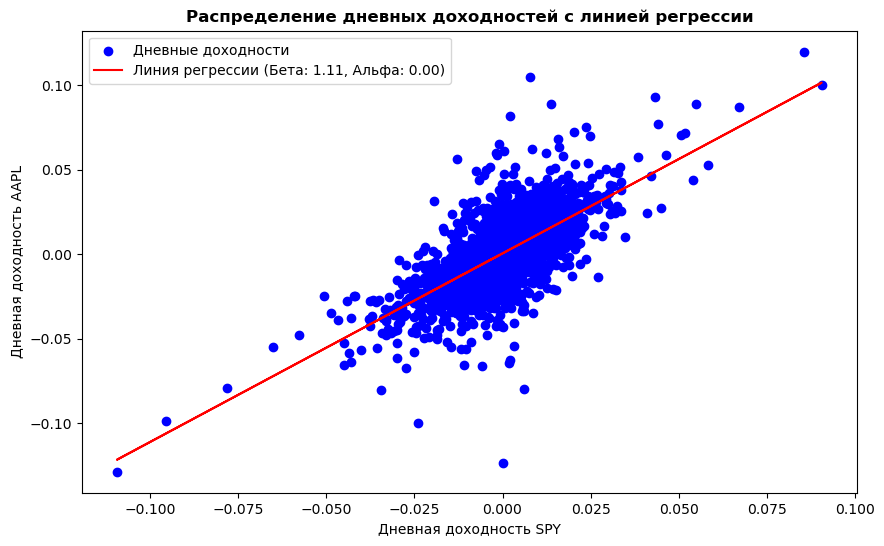

In [156]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = 'Дневные доходности', color = 'blue')

regression_line = beta * x + alpha
plt.plot(x, regression_line, label=f'Линия регрессии (Бета: {beta:.2f}, Альфа: {alpha:.2f})', color = 'red')

plt.xlabel(f'Дневная доходность {benchmark_ticker}')
plt.ylabel(f'Дневная доходность {stock_ticker}')
plt.title(label = f'Распределение дневных доходностей c линией регрессии', fontweight='bold')
plt.legend(frameon=True, shadow=False)

plt.show()

<h3>Интерпретация результатов</h3>
<h4>Коэффициент бета, $\beta$</h4>
<ul>
    <li>$\beta$ &gt; 1: цена инструмента (акции) более волатильна, чем рынок. Если рынок вырастет на 1%, цена инструмента (акции) вырастет более чем на 1%.</li>
    <li>$\beta$ = 1: изменение цены инструмента (акции) соответствует изменению рынка.</li>
    <li>$\beta$ &lt; 1: цена инструмента (акции) менее волатильна, чем рынок. Если рынок вырастет на 1%, цена инструмента (акции) вырастет менее чем на 1%.</li>
    <li>$\beta$ = 0: изменение цены инструмента (акции) не коррелирует с изменением рынка.</li>
    <li>$\beta$ &lt; 0: цена инструмента (акции) изменяется противоположно изменению рынка (рынок растет, а цена инструмента падает).</li>
</ul>
<h4>Коэффициент альфа (альфа Дженсена), $\alpha$</h4>
<ul>
    <li>$\alpha$ &gt; 0: доходность инвестиций в инструмент превысила рыночную доходность с учетом корректировки на риск. Другими словами, доходность является "ненормальной", избыточной. Инвесторы обычно ищут инструменты с положительной альфой.</li>
    <li>$\alpha$ = 0: доходность инвестиций в инструмент соответствует ожидаемому значению, основанному на коэффициенте бета инструмента. Другими словами доходность конкректного инструмента, скорректированная на риск, соответствует рыночной доходности.</li>
    <li>$\alpha$ &lt; 0: доходность инвестиций в инструмент, скорректированная на риск, ниже, чем рыночная доходность. </li>
</ul>